In [1]:
import h5py
import numpy as np

In [2]:
f5 = h5py.File("inpatient_readmission_analysis.hdf5", "r")

In [3]:
independent_array = f5["/independent/core_array"][...]
independent_array.shape

(66700L, 5686L)

In [4]:
independent_labels = f5["/independent/column_annotations"][...]
independent_labels[0: 10]

array(['age_at_visit_start_in_years_int', 'Length of stay in days',
       'gender_concept_name|FEMALE',
       'Past history of 30-day inpatient readmissions',
       'No matching concept|0|C',
       'Gingival and periodontal disease|132344|C',
       'Staphylococcal scalded skin syndrome|132392|C',
       'Pressure ulcer stage 1|132393|C',
       'Post-laminectomy syndrome|132412|C',
       'Chronic osteomyelitis of hand|132414|C'],
      dtype='|S128')

In [5]:
dependent_array = f5["/dependent/core_array"][...]
dependent_array = np.ndarray.flatten(dependent_array)
dependent_array.shape

(66700L,)

In [6]:
np.sum(dependent_array)

6421.0

In [7]:
np.sum(independent_array)

6000119

In [8]:
dependent_labels = f5["/dependent/column_annotations"][...]
dependent_labels

array(['30-day inpatient readmission'],
      dtype='|S128')

In [9]:
import sklearn
sklearn.__version__

'0.19.1'

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(independent_array, dependent_array, test_size=0.2)

In [12]:
X_test

array([[83,  6,  1, ...,  0,  0,  0],
       [64, 11,  1, ...,  0,  0,  0],
       [76,  4,  0, ...,  0,  0,  0],
       ..., 
       [86,  4,  1, ...,  0,  0,  0],
       [63,  6,  1, ...,  0,  0,  0],
       [29,  5,  1, ...,  0,  0,  0]])

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [15]:
variance_thresh = VarianceThreshold()
select_k = SelectKBest(k=250)
random_forest = RandomForestClassifier(n_estimators=500)

pipeline_steps = [("remove_zero_variance", variance_thresh), 
                  ("select_features", select_k), 
                  ("random_forest", random_forest)]

In [16]:
pipeline_obj = Pipeline(pipeline_steps)

In [17]:
pipeline_obj.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('remove_zero_variance', VarianceThreshold(threshold=0.0)), ('select_features', SelectKBest(k=250, score_func=<function f_classif at 0x000000000719F208>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='a...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [18]:
Y_predict = pipeline_obj.predict(X_test)
Y_predict[0: 100]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [19]:
from sklearn.metrics import classification_report

In [20]:
report = classification_report(Y_predict, Y_test)

In [21]:
print(report)

             precision    recall  f1-score   support

        0.0       1.00      0.90      0.95     13281
        1.0       0.00      0.07      0.01        59

avg / total       0.99      0.90      0.94     13340



In [22]:
from sklearn.metrics import roc_curve

In [23]:
Y_test_p = pipeline_obj.predict_proba(X_test)
Y_test_p[0: 10]

array([[ 0.91390741,  0.08609259],
       [ 0.91390741,  0.08609259],
       [ 0.91390741,  0.08609259],
       [ 0.91390741,  0.08609259],
       [ 0.91390741,  0.08609259],
       [ 0.90110616,  0.09889384],
       [ 0.89754901,  0.10245099],
       [ 0.90110616,  0.09889384],
       [ 0.90376927,  0.09623073],
       [ 0.71674551,  0.28325449]])

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
fpr, tpr, _ = roc_curve(Y_test, Y_test_p[:,1])

In [26]:
%matplotlib inline

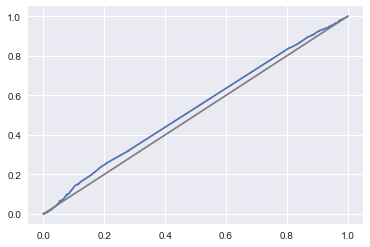

In [27]:
sb.set_style("darkgrid")
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], "k-", color="grey")

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
roc_auc_score(Y_test, Y_test_p[:,1])

0.53082336976838507

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(Y_test, Y_predict)

array([[11994,    55],
       [ 1287,     4]], dtype=int64)

In [32]:
variance_thresh.get_support()

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [33]:
selected_variables1 = independent_labels[variance_thresh.get_support()]

In [34]:
select_k.get_support().shape

(5443L,)

In [35]:
selected_variables2 = selected_variables1[select_k.get_support()]

In [36]:
selected_variables2.shape

(250L,)

In [37]:
features_importances = random_forest.feature_importances_

In [38]:
random_forest.feature_importances_.shape

(250L,)

In [39]:
import numpy as np

In [40]:
decreasing_order_of_features = np.argsort(-1*random_forest.feature_importances_,)

In [41]:
[(selected_variables2[decreasing_order_of_features][i], features_importances[decreasing_order_of_features][i]) 
 for i in range(features_importances.shape[0])]

[('Hypertensive renal disease with renal failure|439697|C',
  0.050012513946377915),
 ('Past history of 30-day inpatient readmissions', 0.040812243232893897),
 ('End stage renal disease|193782|C', 0.039753207232488215),
 ('No matching concept|0|O', 0.033277621355126144),
 ('High risk drug monitoring status|440927|O', 0.028691072431022174),
 ('Correction of cleft palate|2001221|P', 0.023170446836818969),
 ('Long-term drug therapy|4141759|P', 0.021309350634301047),
 ('Repair of hypospadias or epispadias|2003874|P', 0.016413745315967777),
 ('Body mass index 30+ - obesity|4060985|M', 0.016258087588215897),
 ('Acute on chronic diastolic heart failure|40481043|C', 0.015836983631949221),
 ('Postoperative infection|437474|C', 0.015363834224134999),
 ('Dysthymia|433440|C', 0.013741020237324627),
 ('Excisional debridement of wound, infection, or burn|2006533|P',
  0.012688492559476416),
 ('Adverse effect, due to correct medicinal substance properly administered|439221|C',
  0.011197910429358544)